In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#Bagalakote
dist = input("Enter District Name")

Enter District Name Bagalakote


In [3]:
df = pd.read_excel('../DATA EXTRACTION/EXCEL/DISTRICT/'+dist+'.xlsx')
df

,District Name,Today’s Positives,Total Positives,Today’s Discharges,Total Discharges,Total Active Cases,Today’s Reported Covid Deaths,Total Covid Deaths,Death due to Non- Covid reasons,Date
0,Bagalakote,20,208,6,123,80,NaN,5,0,2020-07-01
1,Bagalakote,10,218,0,123,90,NaN,5,0,2020-07-02
2,Bagalakote,8,226,0,123,98,NaN,5,0,2020-07-03
3,Bagalakote,0,226,0,123,98,NaN,5,0,2020-07-04
4,Bagalakote,4,230,14,137,88,NaN,5,0,2020-07-05
...,...,...,...,...,...,...,...,...,...,...
292,Bagalakote,218,31206,625,26474,4475,4.0,257,0,2021-05-23
293,Bagalakote,283,31489,826,27300,3925,7.0,264,0,2021-05-24
294,Bagalakote,211,31700,426,27726,3709,1.0,265,0,2021-05-25
295,Bagalakote,245,31945,548,28274,3403,3.0,268,0,2021-05-26


In [4]:
df['Date']=pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
df.head()

,District Name,Today’s Positives,Total Positives,Today’s Discharges,Total Discharges,Total Active Cases,Today’s Reported Covid Deaths,Total Covid Deaths,Death due to Non- Covid reasons,Date
0,Bagalakote,20,208,6,123,80,NaN,5,0,2020-07-01
1,Bagalakote,10,218,0,123,90,NaN,5,0,2020-07-02
2,Bagalakote,8,226,0,123,98,NaN,5,0,2020-07-03
3,Bagalakote,0,226,0,123,98,NaN,5,0,2020-07-04
4,Bagalakote,4,230,14,137,88,NaN,5,0,2020-07-05


<AxesSubplot:>

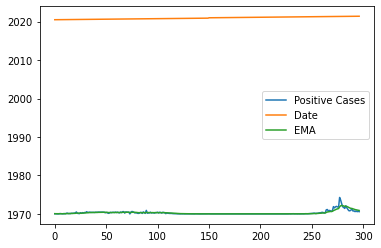

In [5]:
dfts = pd.DataFrame()
dfts["""Positive Cases"""]=df["""Today’s Positives"""]
dfts['Date']=df['Date']
dfts['EMA'] = dfts.iloc[:,0].ewm(span=12,adjust=False).mean()
dfts
title=dist
dfts.plot()

In [6]:
dfts.shape

(297, 3)

In [30]:


fig = px.line(dfts, x='Date', y="""Positive Cases""", title=dist+' Positive Cases')

fig.show()

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfts['Date'], y=dfts["""Positive Cases"""], name='Postive Cases'))
fig.add_trace(go.Scatter(x=dfts['Date'], y=dfts['EMA'], name='Exp Moving Avg'))

# Edit the layout
fig.update_layout(title='Postive cases in '+dist+' District',
                   xaxis_title='Date',
                   yaxis_title='Count of Cases')

fig.show()

In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [34]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [35]:
adfuller_test(df["""Today’s Positives"""])

ADF Test Statistic : -3.068623915554675
p-value : 0.028963989059207277
#Lags Used : 7
Number of Observations Used : 289
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [36]:
dfts['Difference'] = df["""Today’s Positives"""] - df["""Today’s Positives"""].shift(3)
dfts.head()

,Positive Cases,Date,EMA,Difference,forecast
0,20,2020-07-01,20.000000,NaN,NaN
1,10,2020-07-02,18.461538,NaN,NaN
2,8,2020-07-03,16.852071,NaN,NaN
3,0,2020-07-04,14.259445,-20.0,NaN
4,4,2020-07-05,12.681069,-6.0,NaN


<AxesSubplot:>

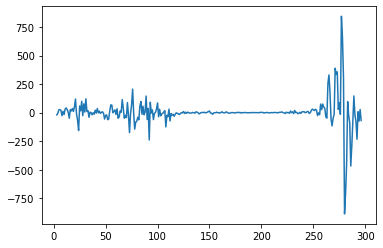

In [37]:
dfts['Difference'].plot()

In [38]:
## Again test dickey fuller test
adfuller_test(dfts['Difference'].dropna())

ADF Test Statistic : -5.423626151653777
p-value : 3.0209206787437347e-06
#Lags Used : 16
Number of Observations Used : 277
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [39]:
# dfts['Second Difference'] = df["""Today’s Positives"""] - df["""Today’s Positives"""].shift(2)
# dfts['Second Difference'].plot()

# # Again test dickey fuller test
# adfuller_test(df['First Difference'].dropna())

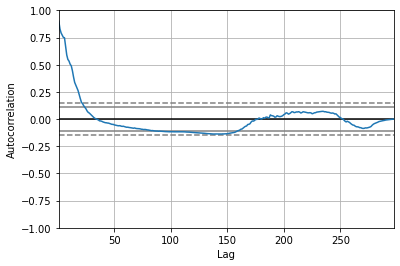

In [40]:

autocorrelation_plot(dfts['Positive Cases'])
plt.show()

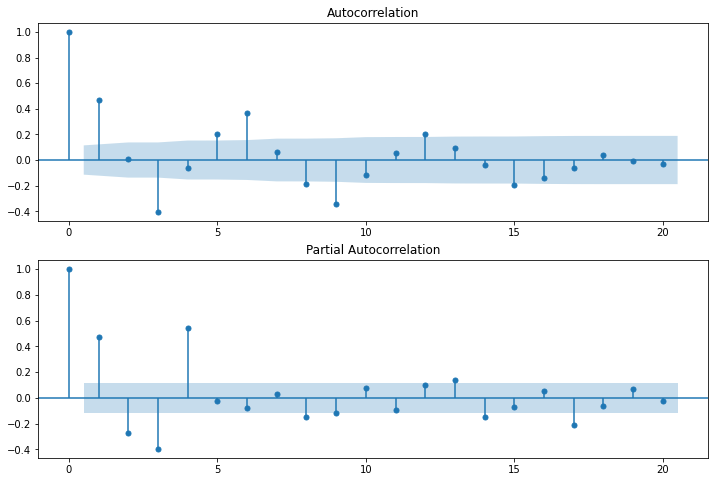

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfts['Difference'].iloc[3:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfts['Difference'].iloc[3:],lags=20,ax=ax2)

In [42]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
dfts['Positive Cases']

0       20
1       10
2        8
3        0
4        4
      ... 
292    218
293    283
294    211
295    245
296    214
Name: Positive Cases, Length: 297, dtype: int64

In [43]:
model=ARIMA(dfts['Positive Cases'],order=(1,1,1))
model_fit=model.fit()

c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


c:\users\danie\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Positive Cases   No. Observations:                  296
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1718.179
Method:                       css-mle   S.D. of innovations             80.278
Date:                Thu, 03 Jun 2021   AIC                           3444.358
Time:                        19:58:07   BIC                           3459.120
Sample:                             1   HQIC                          3450.269
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7416      2.664      0.278      0.781      -4.479       5.962
ar.L1.D.Positive Cases     0.4109      0.123      3.352      0.001       0.171       0.651
ma.L1.D.Positive Cases    -0.6652      0.097     -6.870      0.000      -0.855      -0.475
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4335           +0.0000j            2.4335            0.0000
MA.1            1.5033           +0.0000j            1.5033            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

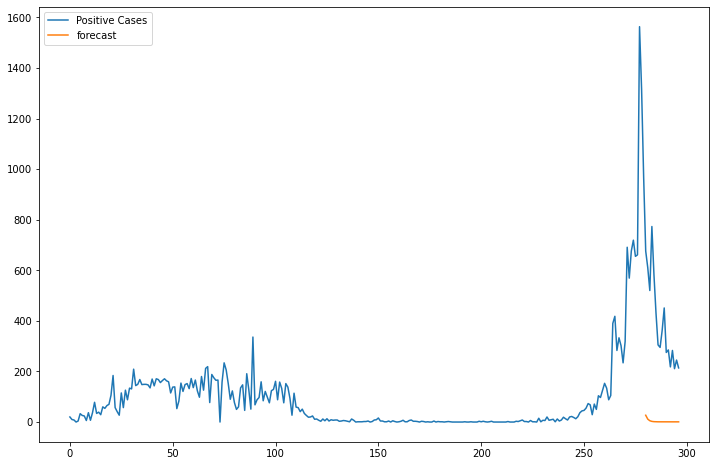

In [47]:
dfts['forecast']=model_fit.predict(start=280,end=297,dynamic=True)
dfts[['Positive Cases','forecast']].plot(figsize=(12,8))

In [48]:
model=sm.tsa.statespace.SARIMAX(dfts['Positive Cases'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

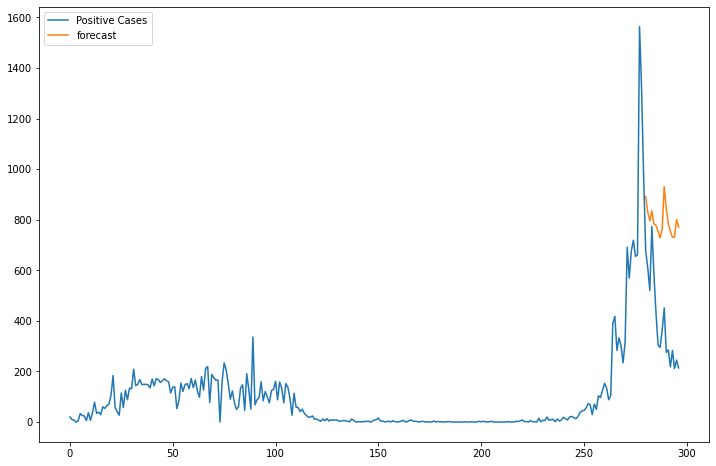

In [49]:
dfts['forecast']=results.predict(start=280,end=297,dynamic=True)
dfts[['Positive Cases','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

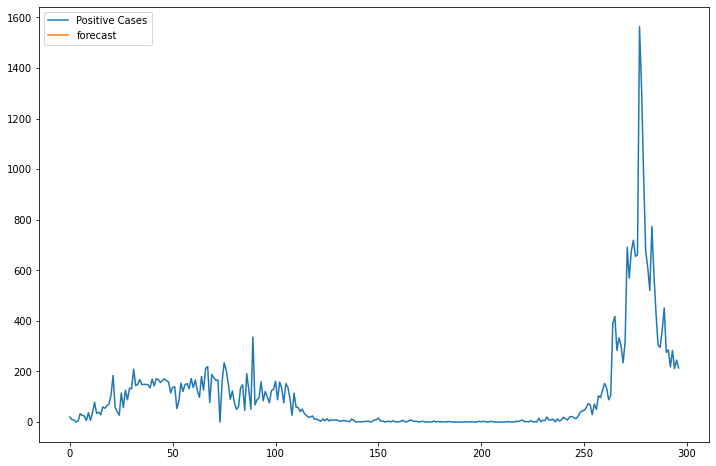

In [50]:
dfts['forecast']=results.predict(start=297,end=310,dynamic=True)
dfts[['Positive Cases','forecast']].plot(figsize=(12,8))